In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

In [43]:
from sklearn.ensemble import IsolationForest as Skforest
from coniferest.isoforest import Isoforest
from coniferest.datasets import MalanchevDataset
import matplotlib.pyplot as plt

In [47]:
dataset = MalanchevDataset(inliers=2**14, outliers=2**6)

def plot_scores(scores):
    outliers = np.argsort(scores)[:2**6]

    plt.figure()
    plt.scatter(*dataset.data.T)
    plt.scatter(*dataset.data[outliers].T, color='r')

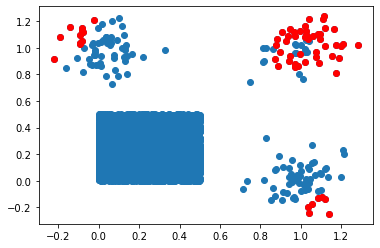

In [274]:
isoforest = Isoforest(n_subsamples=1024, random_seed=30)
isoforest.fit(dataset.data)
scores = isoforest.score_samples(dataset.data)
plot_scores(scores)

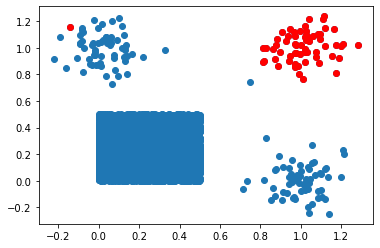

In [145]:
skforest = Skforest()
skforest.fit(dataset.data)
skscores = skforest.score_samples(dataset.data)
plot_scores(skscores)

In [200]:
%load_ext cython

In [216]:
%%cython

cimport numpy as np
from sklearn.tree._tree cimport TreeBuilder
from sklearn.tree._splitter cimport Splitter
from sklearn.tree._criterion cimport Criterion

def getBuilderArgs(TreeBuilder self):
    return self.splitter, self.min_samples_split, self.min_samples_leaf, self.min_weight_leaf, self.max_depth, self.min_impurity_decrease, self.min_impurity_split

def getSplitterArgs(Splitter self):
    return self.criterion, self.max_features, self.min_samples_leaf, self.min_weight_leaf

def getCriterionArgs(Criterion self):
    return self.n_outputs, self.n_samples

In [217]:
getCriterionArgs(getSplitterArgs(getBuilderArgs(isoforest.builder)[0])[0])

(1, 256)

In [212]:
getBuilderArgs(skforest.base_estimator.builder)

AttributeError: 'ExtraTreeRegressor' object has no attribute 'builder'